Simple profile estimation of light emitted and aperture fit

In [ ]:
import PIL as pil
import numpy as np
import matplotlib.pyplot as plt
import  photutils as ph

Load the image from SDSS cutouts and convert the image to np array

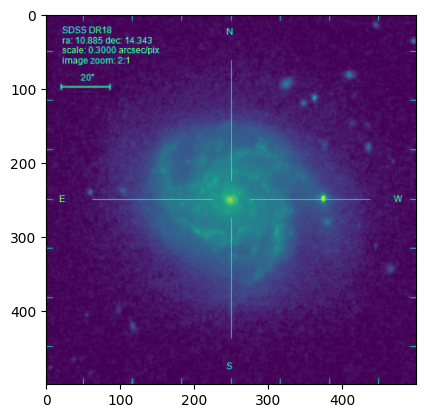

In [41]:
img=pil.Image.open("/home/kevin/aufklarung_astro_station/project2/images/image_10.884908ra_14.34258dec_GALAXY_471804044415887360specObjID_SDSS_dr18.jpg")
img_array=np.array(img)
img_array.shape
img_array=img_array[:,:,1]
plt.imshow(img_array)

Compute radial profile of the galaxy

In [17]:
xycen=ph.centroids.centroid_quadratic(img_array, xpeak=250, ypeak=250)
from photutils.profiles import RadialProfile
edge_radii = np.arange(150)
rp = RadialProfile(img_array, xycen, edge_radii)

Plot the profile and the aperture

(<matplotlib.patches.PathPatch at 0x7c619db0c8f0>,)

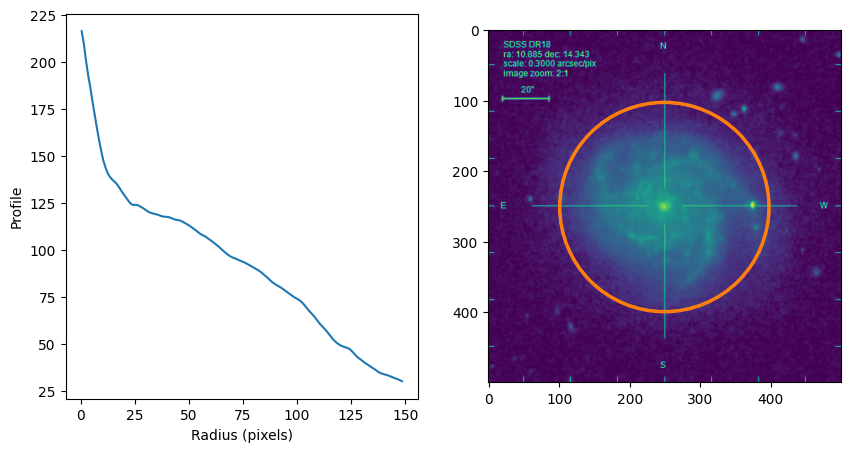

In [38]:

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
rp.plot(label='Radial Profile')
plt.subplot(1,2,2)
plt.imshow(img_array)
rp.apertures[148].plot(color='C1', lw=2)

Try to fit a isophote to the galaxy by guessing the ellipse params

(<matplotlib.patches.Ellipse at 0x7c619d1f13d0>,)

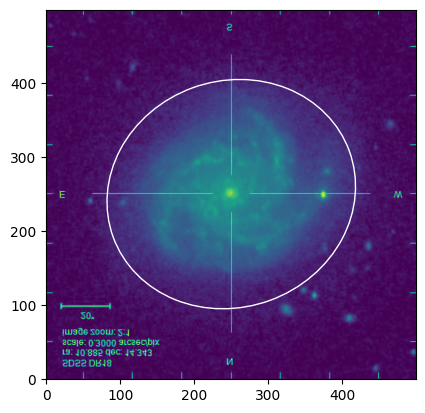

In [50]:
from photutils.aperture import EllipticalAperture

from photutils.isophote import EllipseGeometry

geometry = EllipseGeometry(x0=250, y0=250, sma=170, eps=0.1,
                           pa=20.0 * np.pi / 180.0)

aper = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma,
                          geometry.sma * (1 - geometry.eps),
                          geometry.pa)
plt.imshow(img_array, origin='lower')
aper.plot(color='white')

Now fit a series of ellipses to the galaxy

In [53]:
from photutils.isophote import Ellipse
from photutils.isophote import build_ellipse_model

ellipse = Ellipse(img_array, geometry)
isolist = ellipse.fit_image()

Generate the list of isophotes by model fittting

In [54]:
model_image = build_ellipse_model(img_array.shape, isolist)
residual = img_array - model_image

Plot all the : actual image, model image, residual 

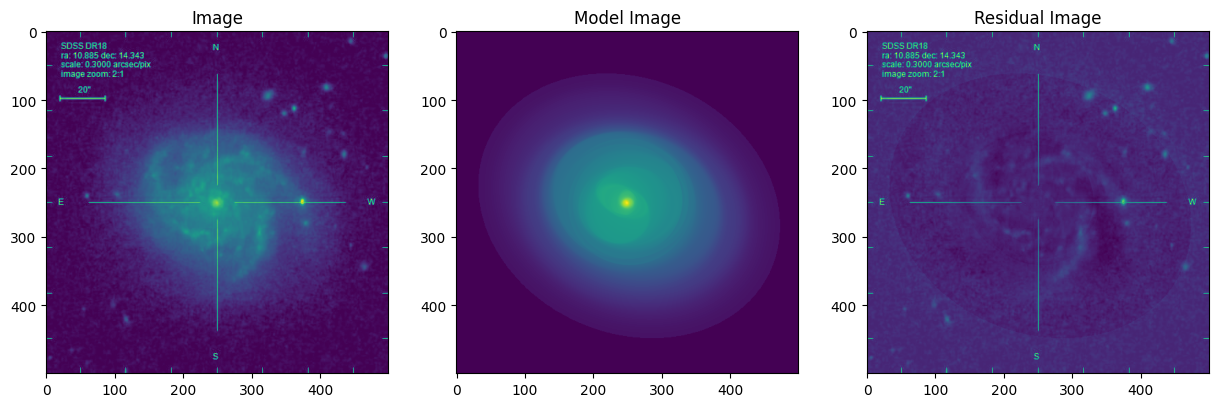

In [59]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Image")
plt.imshow(img_array)
plt.subplot(1,3,2)
plt.title("Model Image")
plt.imshow(model_image)
plt.subplot(1,3,3)
plt.title("Residual Image")
plt.imshow(residual)